In [1]:
import pandas as pd
from BoxingRecognition.util import DynamicTimeWarpingUtility, DataUtility, EvaluationUtility

# Random Templates

In [2]:
# Templates based off of randomly selected samples
left_slip_template = pd.read_csv('../Data/dtw/slip_left_template.csv')
right_slip_template = pd.read_csv('../Data/dtw/slip_right_template.csv')
left_roll_template = pd.read_csv('../Data/dtw/roll_left_template.csv')
right_roll_template = pd.read_csv('../Data/dtw/roll_right_template.csv')
pull_back_template = pd.read_csv('../Data/dtw/pull_back_template.csv')

# Put the templates into a dictionary
dtw_templates_random = {
    'left_slip': left_slip_template[['sensor_gyroY', 'sensor_accX']],
    'right_slip': right_slip_template[['sensor_gyroY', 'sensor_accX']],
    'left_roll': left_roll_template[['sensor_gyroY', 'sensor_accX']],
    'right_roll': right_roll_template[['sensor_gyroY', 'sensor_accX']],
    'pull_back': pull_back_template[['sensor_gyroY', 'sensor_accX']]
}

In [3]:
# Load in all sequences
idle_sequences, left_slip_sequences, right_slip_sequences, left_roll_sequences, right_roll_sequences, pull_back_sequences = DataUtility.collect_label_sequences(
    DataUtility.get_aggregate_df(drop_unlabeled_data=False, sessions=[1, 2, 3, 4, 5, 6], shuffle_sequences=False,
                                 augment_data=False))
all_sequences = {
    'left_slip': left_slip_sequences,
    'right_slip': right_slip_sequences,
    'left_roll': left_roll_sequences,
    'right_roll': right_roll_sequences,
    'pull_back': pull_back_sequences
}

# Test the classification using DTW
# results = DynamicTimeWarpingUtility.test_classification(sequences_to_test=all_sequences,
#                                                         dtw_templates=dtw_templates_random)
# results.head()

In [4]:
# EvaluationUtility.evaluate_dtw(results_df=results, template_keys=list(dtw_templates_random.keys()))

# DBA Templates

In [5]:
# Templates based off of randomly selected samples
left_slip_template = pd.read_csv('../Data/dtw/dba_cut_left_slip_template')
right_slip_template = pd.read_csv('../Data/dtw/dba_cut_right_slip_template')
left_roll_template = pd.read_csv('../Data/dtw/dba_cut_left_roll_template')
right_roll_template = pd.read_csv('../Data/dtw/dba_cut_right_roll_template')
pull_back_template = pd.read_csv('../Data/dtw/dba_cut_pull_back_template')

# Put the templates into a dictionary
dtw_templates_DBA = {
    'left_slip': left_slip_template[['sensor_gyroY', 'sensor_accX']],
    'right_slip': right_slip_template[['sensor_gyroY', 'sensor_accX']],
    'left_roll': left_roll_template[['sensor_gyroY', 'sensor_accX']],
    'right_roll': right_roll_template[['sensor_gyroY', 'sensor_accX']],
    'pull_back': pull_back_template[['sensor_gyroY', 'sensor_accX']]
}

In [6]:
# Test the classification using DTW
results_dba = DynamicTimeWarpingUtility.test_classification(sequences_to_test=all_sequences,
                                                        dtw_templates=dtw_templates_DBA)
results_dba

Testing class pull_back: 100%|██████████| 459/459 [00:14<00:00, 30.68sequence/s]


,correct_class,predicted_class,dtw_distance,dtw_path
0,left_slip,left_slip,113.846150,"[(0, 0), (1, 1), (2, 2), (2, 3), (3, 4), (4, 4..."
1,left_slip,left_slip,144.071731,"[(0, 0), (1, 1), (1, 2), (2, 3), (3, 4), (4, 5..."
2,left_slip,left_slip,110.124620,"[(0, 0), (0, 1), (0, 2), (1, 3), (2, 4), (2, 5..."
3,left_slip,left_slip,84.715678,"[(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4..."
4,left_slip,left_slip,130.909326,"[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5..."
...,...,...,...,...
2290,pull_back,pull_back,71.517588,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5..."
2291,pull_back,pull_back,87.115843,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5..."
2292,pull_back,pull_back,91.324143,"[(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5..."
2293,pull_back,pull_back,93.503053,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 5..."


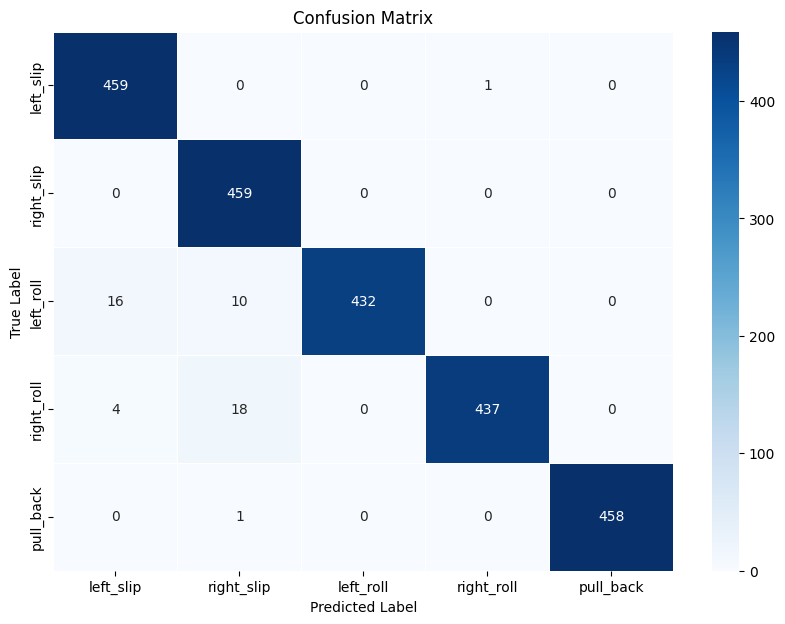

              precision    recall  f1-score   support

   left_slip       0.96      1.00      0.98       460
  right_slip       0.94      1.00      0.97       459
   left_roll       1.00      0.94      0.97       458
  right_roll       1.00      0.95      0.97       459
   pull_back       1.00      1.00      1.00       459

    accuracy                           0.98      2295
   macro avg       0.98      0.98      0.98      2295
weighted avg       0.98      0.98      0.98      2295



In [7]:
EvaluationUtility.evaluate_dtw(results_df=results_dba, template_keys=list(dtw_templates_DBA.keys()))